In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from google.colab import drive, files
import io

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_without_label.csv') ##Este no es el test que se usa para entrenar.

# 1. Análisis de datos


In [ ]:
train.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [ ]:
train.info

<bound method DataFrame.info of         id                                              tweet label
0        1  Chinese converting to Islam after realising th...  fake
1        2  11 out of 13 people (from the Diamond Princess...  fake
2        3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3        4  Mike Pence in RNC speech praises Donald Trump’...  fake
4        5  6/10 Sky's @EdConwaySky explains the latest #C...  real
...    ...                                                ...   ...
8555  8556  A tiger tested positive for COVID-19 please st...  fake
8556  8557  ???Autopsies prove that COVID-19 is??� a blood...  fake
8557  8558  _A post claims a COVID-19 vaccine has already ...  fake
8558  8559  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake
8559  8560  It has been 93 days since the last case of COV...  real

[8560 rows x 3 columns]>

In [ ]:
##confirmar nulos train.isnull().mean()

## Transformamos los datos en String:

In [ ]:
train['id'] = train['id'].astype(str)
train['tweet'] = train['tweet'].astype(str)
train['label'] = train['label'].astype(str)
##train['short_description'] = train['short_description'].astype(str)

## Información interesante del df:

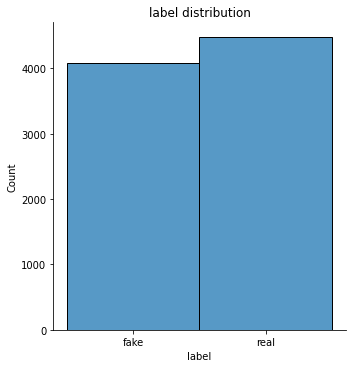

In [ ]:
sns.displot(train["label"]);
plt.title("label distribution");

In [ ]:
##Si pandas_profiling funciona mal:
##!pip install pandas-profiling==2.7.1
##!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train)

profile

### Sacamos el Id reptido


In [ ]:
train.drop(['id'], axis=1)
train.set_index("id", inplace = True)

In [ ]:
train

,tweet,label
id,,
1,Chinese converting to Islam after realising th...,fake
2,11 out of 13 people (from the Diamond Princess...,fake
3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
4,Mike Pence in RNC speech praises Donald Trump’...,fake
5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...
8556,A tiger tested positive for COVID-19 please st...,fake
8557,???Autopsies prove that COVID-19 is??� a blood...,fake
8558,_A post claims a COVID-19 vaccine has already ...,fake


In [ ]:
## Agregar columnas y sacar largo de string
##train['Tweet lenght'] = train["tweet"].str.len()
##train.columns.append("Length", int);

# 2. Train y Validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(
    train.drop('label', axis=1),
    train['label'],
    test_size=(1.0/3), random_state=42)

print(f'X_Data shape = {train.shape}')
print(f'X_train shape = {X_train.shape}\n{X_train.head()}\n------------------------')
print(f'Y_train shape = {Y_train.shape}\n{Y_train.head()}\n------------------------')
print(f'X_test shape = {X_validation.shape}\n{X_validation.head()}\n------------------------')
print(f'Y_test shape = {Y_validation.shape}\n{Y_validation.head()}')

In [ ]:
#https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/



##skf= StratifiedKFold(5, shuffle=true,random_state=1)
##cross_val_score(clf,x_clf,y_clf,cv=skf,scoring='accuracy')

In [ ]:
X_train

# 3. Preprocesamiento básico

In [ ]:
X_train["tweet"] = X_train["tweet"].astype(str)

In [ ]:
#X_train["tweet"]

## Fit

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bag_of_words_train = count_vectorizer.fit(X_train["tweet"])

NameError: ignored

In [ ]:
print(bag_of_words_train.get_feature_names())

['00', '000', '000waoe6e1', '00ice', '00pm', '01', '01ododggyq', '02', '03', '033', '03hguvcatu', '03kvl3ooxu', '04', '04051952n', '047lsdtrqn', '04dpqpumxs', '04jepehxp7', '04piswidhw', '05', '054', '05am', '06', '062454254', '063661060', '0651', '07', '0710', '08', '0800', '0840hh9nbs', '0881911', '09', '093020408', '0940', '09kofbfifk', '0b55tnqvrh', '0cbk5ykv94', '0clnmzaynm', '0d5kvrnvbe', '0d99flmeyc', '0dajqm41hi', '0djnh0rtwn', '0epqswpgfv', '0esau03igl', '0exkc1kf1h', '0fwlwa8ves', '0gmvqqb9hb', '0go5izgiqf', '0h81pytnx9', '0hb3bfjoaf', '0hggjzunp3', '0imiyqykyv', '0kh7uorfvy', '0kpfvguj2a', '0l4jnllcox', '0leqxe1cuv', '0lgnecszo9', '0lmzr3kqn4', '0lnm4htcci', '0nfuq0jjds', '0oecvtuvcd', '0pejdsy3pg', '0pgdjkgdbk', '0pp491sxk1', '0q7vqp', '0qdoewhbbw', '0rarygxc94', '0rqv4ygoqr', '0rspydensl', '0sw9dsfsim', '0t6fshc3pa', '0tqe2ct3zj', '0tshdj79rg', '0ueqyllcna', '0vhhd4ufv9', '0vqwfwrb7d', '0vrcpdzjjs', '0wgnlj1n6h', '0whwe3fe4v', '0x4xey1iiz', '0yvdxbj3ww', '0zaernrbqd', '0zq

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Transform

In [ ]:
bag_of_words_train = count_vectorizer.transform(X_train["tweet"])
bag_of_words_train = pd.DataFrame(bag_of_words_train.toarray(), columns = count_vectorizer.get_feature_names())

In [ ]:
bag_of_words_train

# 4. Aprendizaje supervisado - Arbol

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=42)
arbol = arbol.fit(bag_of_words_train, Y_train)

## Predicción validation

In [ ]:
bag_of_words_test = count_vectorizer.transform(X_validation["tweet"])

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = arbol.predict(bag_of_words_test)
print(accuracy_score(Y_pred,Y_validation))

0.7929222144358795


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Predicción Test

In [ ]:
test.columns

Index(['id', 'tweet'], dtype='object')

In [ ]:
test['id'].astype('str')
test['tweet'].astype('str')

In [ ]:
##test.drop(['id'], axis=1)
##test.set_index("id", inplace = True)

In [ ]:
test.info
#test["tweet"]

In [ ]:
test_bag = count_vectorizer.transform(test["tweet"])

In [ ]:
test_bag = pd.DataFrame(test_bag.toarray(), columns = count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_prediction = arbol.predict(test_bag)

##prediction = pd.DataFrame()
##prediction['label'] = test_prediction

prediction = pd.DataFrame(test_prediction, columns=['label'])
prediction.index += 1
prediction = prediction.to_csv('prediction.csv')

In [ ]:
from google.colab import files

files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Puntos de mejora

Este primer intento no tuvo ningún tipo de procesamiento extra, solo el básico para poder crear el vectorizer, un árbol, y hacer una predicción. Sirve como una base para saber cual es el error inicial que hay que mejorar. Sin esto, podríamos cometer el error de hacer ciertos cambios que realmente estén subiendo el error pero que relativamente entre ellos hayan mejoras.

Posibles mejoras:

--> Eliminar palabras que no significan nada (hay muchos strings sin sentido)

--> Utilizar Stop words para reducir la cantidad de variables y utilizar las que nos den la mayor información (evitando palabras como artículos que no nos aportan mucho)

--> Reducción a la raiz

--> Evaluar el impacto de utilizar números en el entrenamiento

--> Buscar otros hiperparametros que puedan ser útiles para el entrenamiento. En la letra se sugiere 

  &emsp;• Largo del documento

  &emsp;• Cantidad de palabras

  &emsp;• Cantidad de letras

--> Buscar otros modelos de aprendizaje supervisado de clasificación: vamos a utilizar una red neuronal

--> Investigar hiperparametros relevantes del modelo (si fuera un árbol: profundidad, # de hojas, etc.), como capas y funcioens de activación.


# 5. Ingeniería de atributos

## Cargar datos y dividir dataset

In [2]:
from tensorflow.random import set_seed
set_seed(234730)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_without_label.csv')

In [4]:
train['id'] = train['id'].astype(str)
train['tweet'] = train['tweet'].astype(str)
train['label'] = train['label'].astype(str)

In [5]:
train.drop(['id'], axis=1)
train.set_index("id", inplace = True)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(
    train.drop('label', axis=1),
    train['label'],
    test_size=(1.0/3), random_state=42)

## Stop words y lemmatize

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
Lemmatizer = WordNetLemmatizer()
#analyzer = CountVectorizer().build_analyzer()

from zipfile import ZipFile
file_loc = '/root/nltk_data/corpora/wordnet.zip'
with ZipFile(file_loc, 'r') as z:
  z.extractall('/root/nltk_data/corpora/')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
#Lemmatizer
def lemmatized_words(doc):
  return (Lemmatizer.lemmatize(w.lower()) for w in doc.split())

#CountVectorizer con stopwords de Natural Language Toolkit
nltk.download('stopwords')

nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## CountVectorizer con los nuevos parametros

In [21]:
vectorizer_stop_words_stemmed = CountVectorizer(stop_words = nltk.corpus.stopwords.words('english'), analyzer=lemmatized_words)
bag_of_words = vectorizer_stop_words_stemmed.fit(X_train["tweet"])

print(bag_of_words.get_feature_names())

['!', '!!', '!!!', '!☺', '"', '"\'this', '"..in', '"17', '"4', '"5g', '"99%"', '"[t]he', '"a', '"activates"', '"agree', '"akira???', '"allahu', '"almost', '"although', '"antibodies"', '"antidotes."', '"anybody', '"anyone', '"appalling', '"are', '"around', '"arsenicum', '"as', '"because', '"being', '"bill', '"biological', '"bioweapon', '"bought', '"bound', '"burning', '"but', '"cases', '"caused"', '"celebrate"', '"center', '"centre', '"certificate', '"challenge"', '"chaotic".', '"china', '"claire', '"class', '"clean"', '"clearly', '"clo2"', '"clorox', '"colloidal', '"come', '"considerable', '"contagion', '"containment', '"continue', '"corona', '"coronavirus', '"coronavirus"', '"coronavirus."', '"could', '"council', '"cov...,"', '"covid', '"covid-(1).”', '"covid-19', '"covid-19"', '"cumulative', '"cure"', '"cures', '"current"', '"currently', '"dark', '"deadly', '"decision', '"destroy"', '"direct', '"disobeyed', '"doctors', '"doubling"', '"down', '"dramatically', '"drink', '"effective', '

Hay muchas palabras que estan repetidas como "august", "august,", "august.", "august:", etc. Hay que eliminar esas palabras y dejarlas como una sola. También se nota que hay muchos emojis y signos, que habría que ver como los vamos a manejar

In [19]:
bag_of_words = vectorizer_stop_words_stemmed.transform(X_train["tweet"])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer_stop_words_stemmed.get_feature_names())

In [20]:
bag_of_words.shape

(5706, 23976)

In [ ]:
model = Sequential()
model.add(Dense(8, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(1))